In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append("../model")
sys.path.append("../control")
from networks import *
from analysis_util import *
%load_ext autoreload
%autoreload 2

## 1. Non-Linear Pendulum

Comparision between a) No transformation on either inputs and auxiliary network b) RBF on input, nothing on auxiliary c) nothing on input, RBF on auxiliary d) RBF on both

In [13]:
model_names = ["d-rbf-exp-1", "d-rbf-exp-2", "d-rbf-exp-3", "d-rbf-exp-4"]
model_labels = [r"$F/F$", r"$T/F$", r"$F/T$", r"$T/T$"]
PATH = "../saved/logs/models/denis-rbf-exp/pendulum"
x_true = np.load('../data/raw_data/affine/pend_val.npy')

models, model_configs = load_models([DENIS]*4, PATH, model_names)

100%|██████████| 4/4 [00:18<00:00,  4.68s/it]


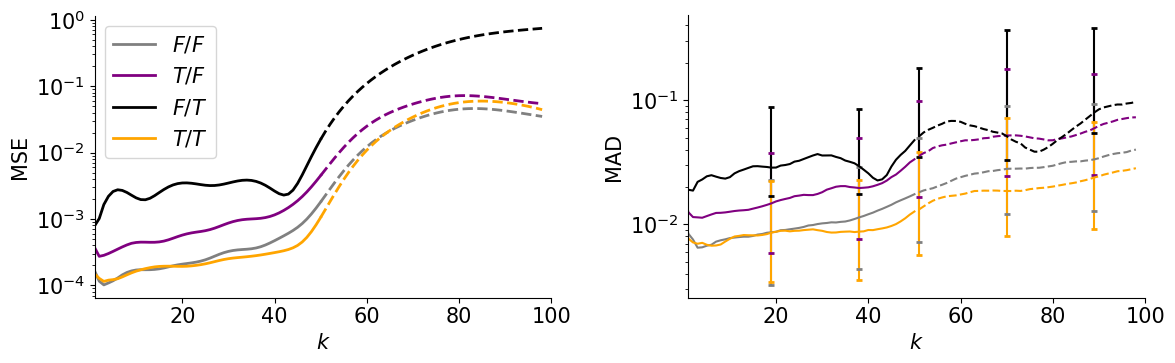

In [5]:
n_shifts = model_configs[0]['n_shifts']
t_end = 100
results = plot_mse_mad(models, model_labels, x_true, n_shifts, t_end)

$F/F$


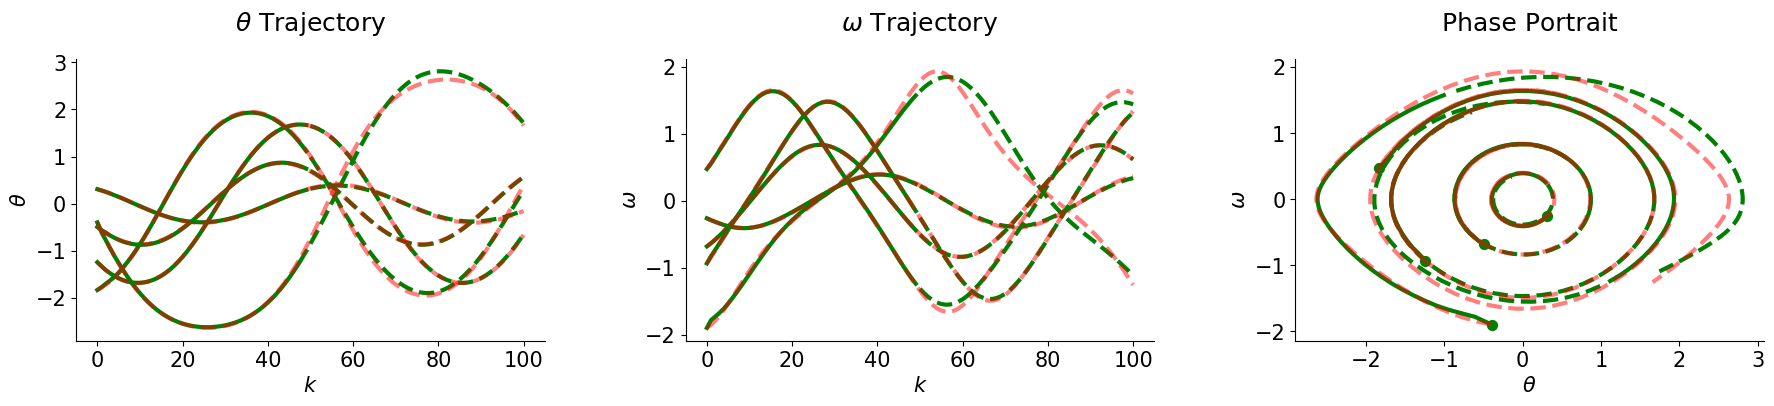

$F/T$


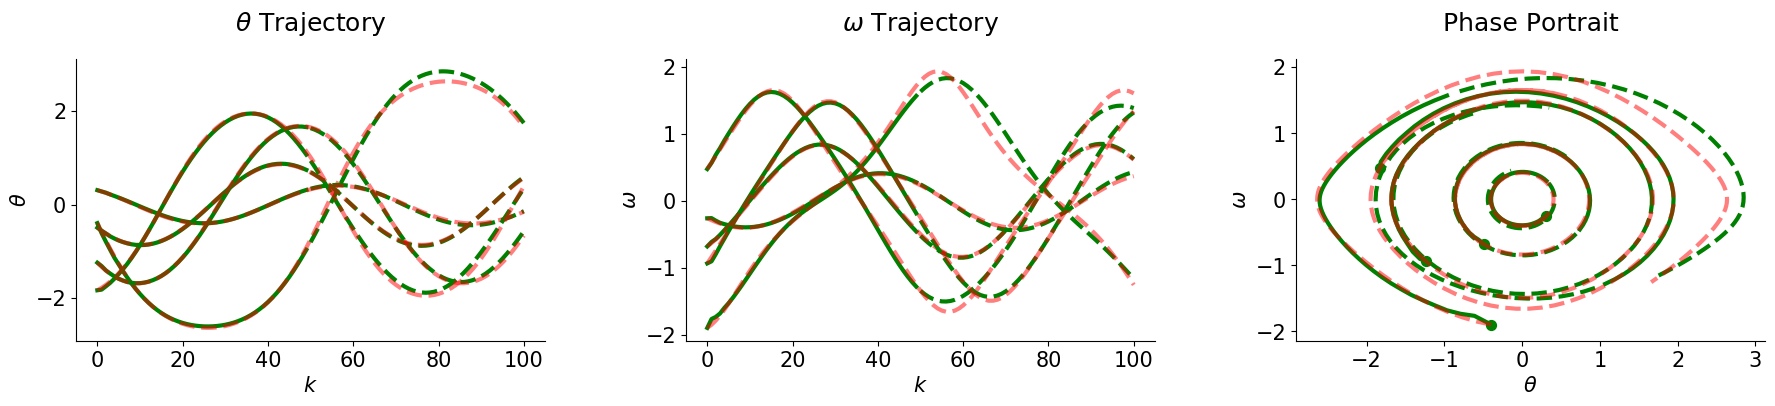

$T/F$


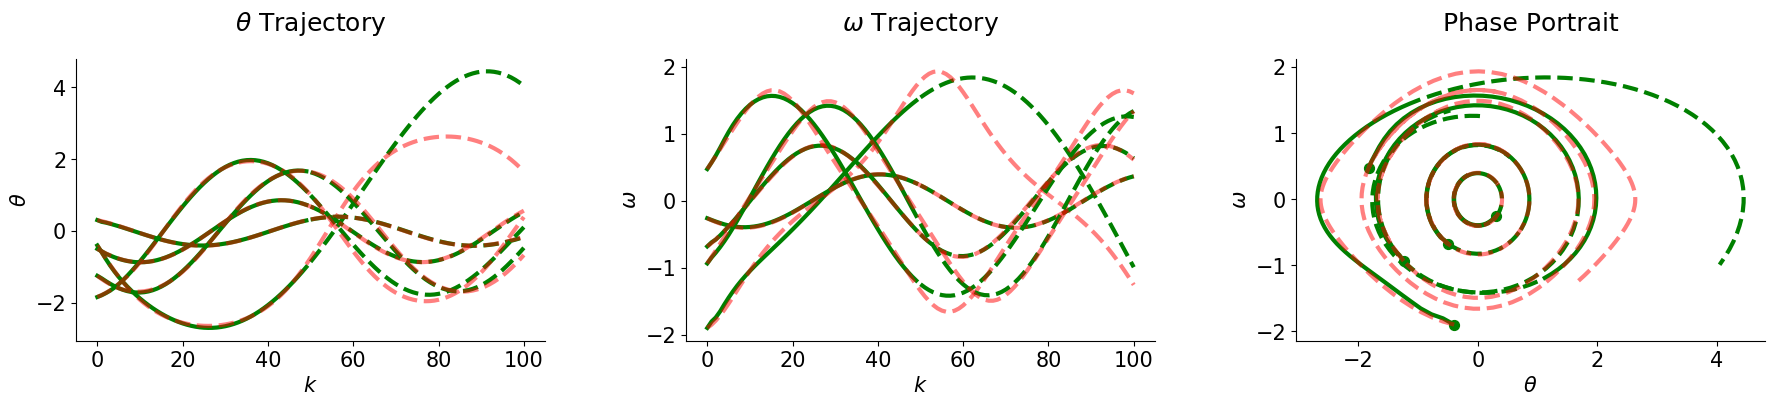

$T/T$


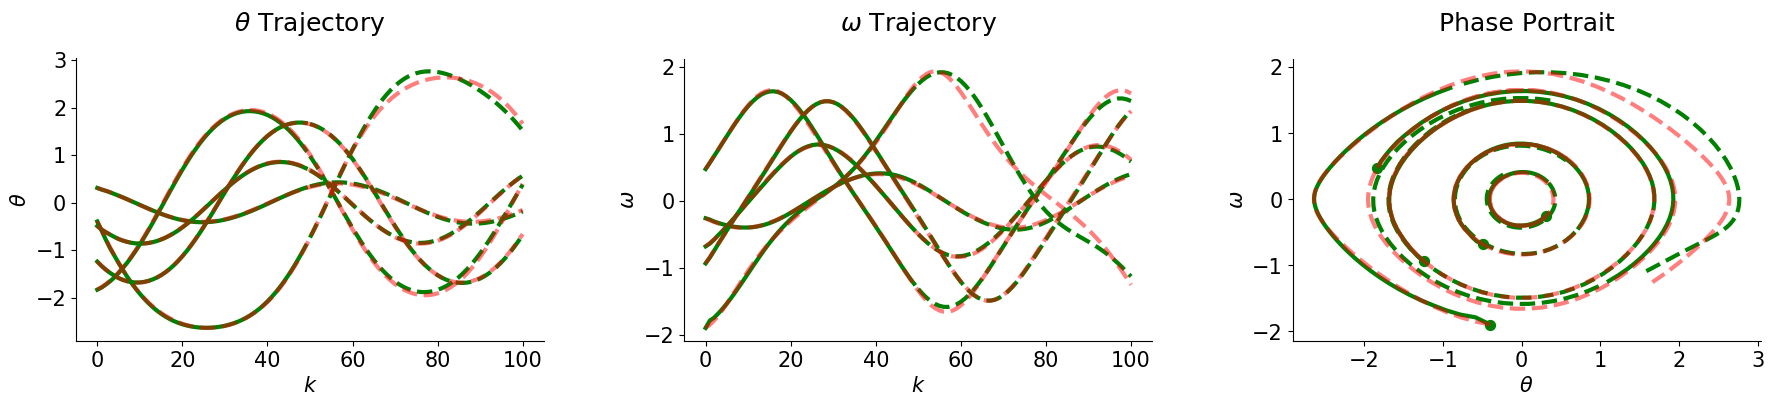

In [8]:
for i in range(4):
    print(model_labels[i])
    _ = plot_trajectories(models[i], 50, x_true)

Comparision between RBF transformation and no transformation, but with higher depth

In [7]:
model_names = ["d-rbf-exp-4", "d-latent-exp-2"]
model_labels = [r"$RBF$", r"$No RBF$"]
PATH = "../saved/logs/models/denis-rbf-exp/pendulum"
x_true = np.load('../data/raw_data/affine/pend_val.npy')

models, model_configs = load_models([DENIS]*2, PATH, model_names)

100%|██████████| 2/2 [00:08<00:00,  4.47s/it]


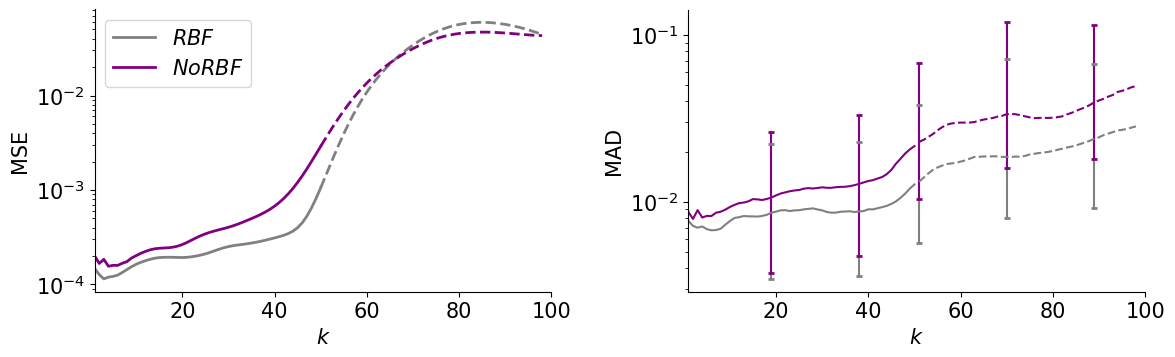

In [8]:
n_shifts = model_configs[0]['n_shifts']
t_end = 100
results = plot_mse_mad(models, model_labels, x_true, n_shifts, t_end)

## Duffing Oscillator

In [17]:
model_names = ["d-rbf-exp-1", "d-rbf-exp-2", "d-rbf-exp-3", "d-rbf-exp-4"]
model_labels = [r"$F/F$", r"$T/F$", r"$F/T$", r"$T/T$"]
PATH = "../saved/logs/models/denis-rbf-exp/duffing"
x_true = np.load('../data/raw_data/affine/duffing_val.npy')

models, model_configs = load_models([DENIS]*4, PATH, model_names)

In [18]:
model_configs

[{'network': 'denis',
  'mode': 'floyd',
  'train_data': '/data/raw_data/duffing_train.npy',
  'val_data': '/data/raw_data/duffing_val.npy',
  'enc_shape': [2, 50, 25, 25, 50],
  'aux_shape': [2, 50, 25, 25, 52],
  'n_shifts': 51,
  'use_rbf': False,
  'kernel': 'None',
  'aux_rbf': False,
  'drop_prob': 0.0,
  'dt': 0.1,
  'state_loss': 1.0,
  'latent_loss': 1.0,
  'zero_loss': 1.0,
  'reg_loss': 1e-07,
  'inf_loss': 0.0001,
  'lr': 0.0005,
  'lr_sch_step': 50,
  'lr_sch_gamma': 0.5,
  'description': 'Does using RBF help? No RBF duffing'},
 {'network': 'denis',
  'mode': 'floyd',
  'train_data': '/data/raw_data/duffing_train.npy',
  'val_data': '/data/raw_data/duffing_val.npy',
  'enc_shape': [2, 50, 25, 25, 50],
  'aux_shape': [2, 50, 25, 25, 52],
  'n_shifts': 51,
  'use_rbf': True,
  'kernel': 'gaussian',
  'aux_rbf': False,
  'drop_prob': 0.0,
  'dt': 0.1,
  'state_loss': 1.0,
  'latent_loss': 1.0,
  'zero_loss': 1.0,
  'reg_loss': 1e-07,
  'inf_loss': 0.0001,
  'lr': 0.0005,
  'l

100%|██████████| 4/4 [00:17<00:00,  4.48s/it]


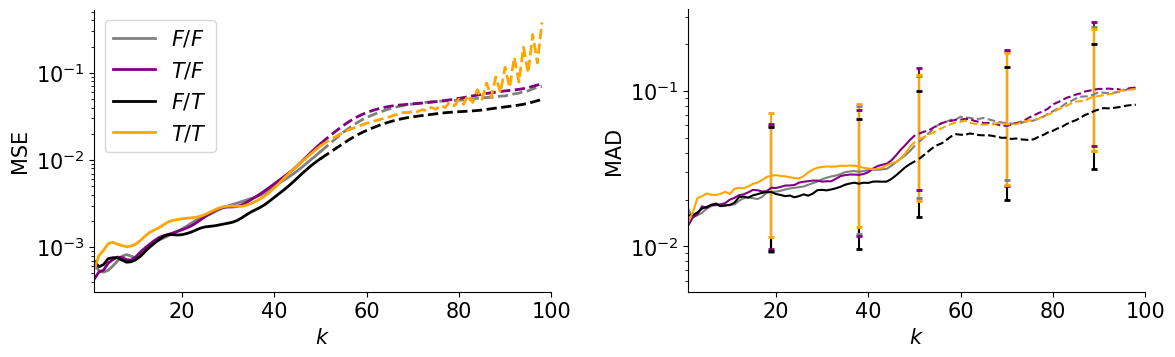

In [10]:
n_shifts = model_configs[0]['n_shifts']
t_end = 100
results = plot_mse_mad(models, model_labels, x_true, n_shifts, t_end)

$F/F$


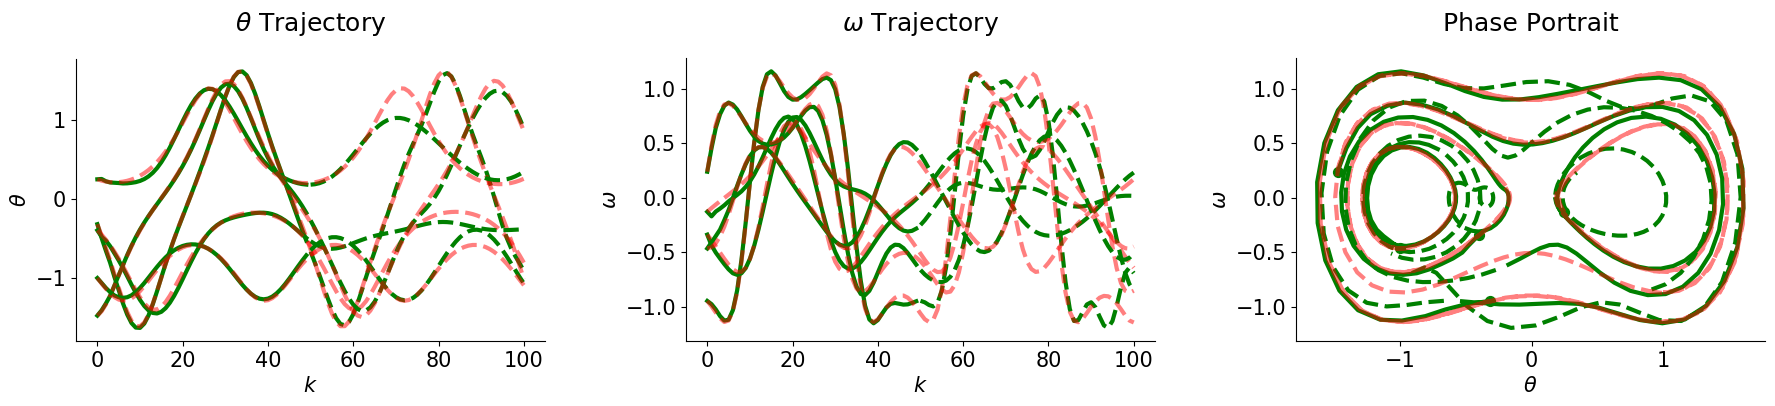

$T/F$


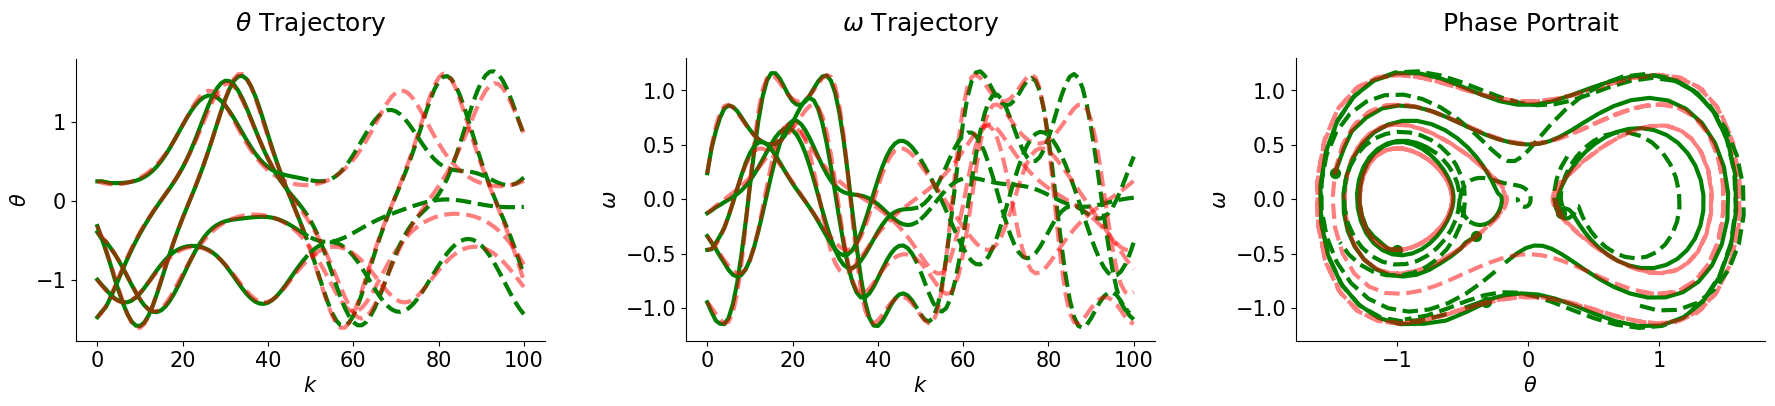

$F/T$


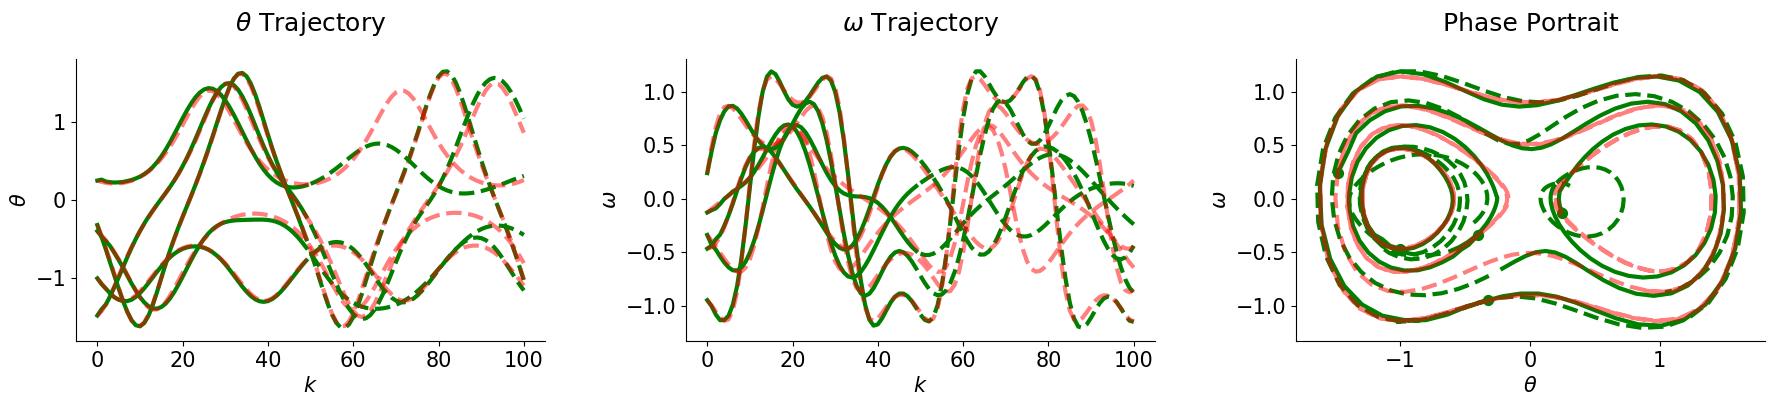

$T/T$


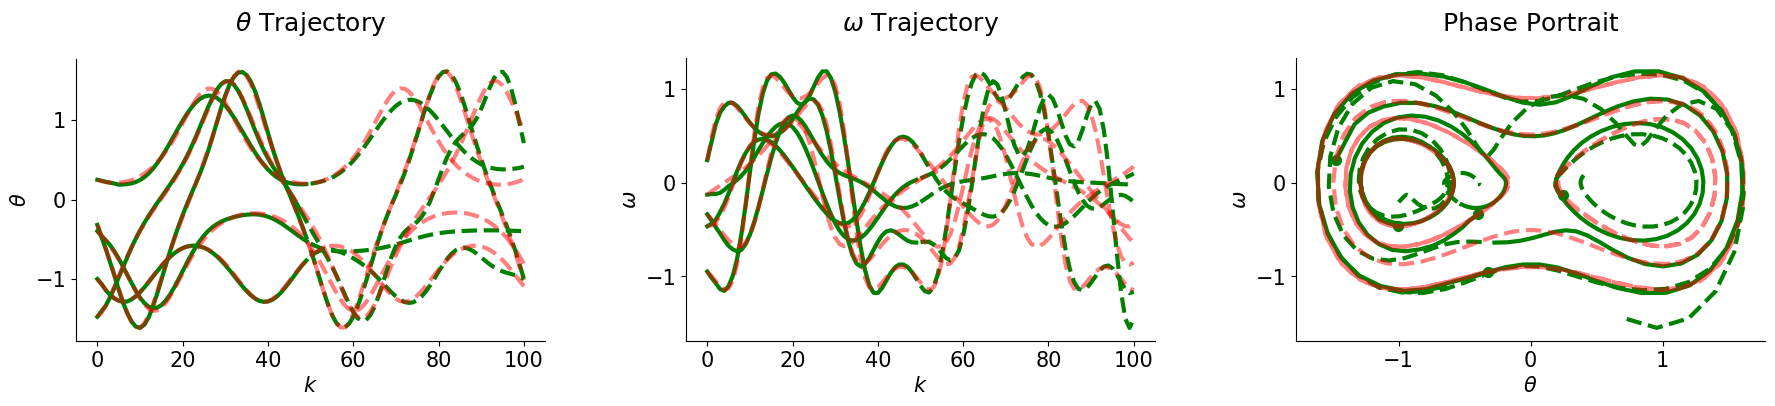

In [10]:
for i in range(4):
    print(model_labels[i])
    _ = plot_trajectories(models[i], 50, x_true)

Comparision between RBF transformation and no transformation, but with higher depth

In [20]:
model_names = ["d-rbf-exp-3", "d-depth-exp-3"]
model_labels = [r"$RBF$", r"$No RBF$"]
PATH = "../saved/logs/models/denis-rbf-exp/duffing"
x_true = np.load('../data/raw_data/affine/duffing_val.npy')

models, model_configs = load_models([DENIS]*2, PATH, model_names)

In [21]:
model_configs

[{'network': 'denis',
  'mode': 'floyd',
  'train_data': '/data/raw_data/duffing_train.npy',
  'val_data': '/data/raw_data/duffing_val.npy',
  'enc_shape': [2, 50, 25, 25, 50],
  'aux_shape': [2, 50, 25, 25, 52],
  'n_shifts': 51,
  'use_rbf': False,
  'kernel': 'gaussian',
  'aux_rbf': True,
  'drop_prob': 0.0,
  'dt': 0.1,
  'state_loss': 1.0,
  'latent_loss': 1.0,
  'zero_loss': 1.0,
  'reg_loss': 1e-07,
  'inf_loss': 0.0001,
  'lr': 0.0005,
  'lr_sch_step': 50,
  'lr_sch_gamma': 0.5,
  'description': 'Does using RBF help? RBF auxiliary duffing'},
 {'network': 'denis',
  'mode': 'floyd',
  'train_data': '/data/raw_data/duffing_train.npy',
  'val_data': '/data/raw_data/duffing_val.npy',
  'enc_shape': [2, 25, 25, 25, 25, 25, 50],
  'aux_shape': [2, 25, 25, 25, 25, 25, 52],
  'n_shifts': 51,
  'use_rbf': False,
  'kernel': 'None',
  'aux_rbf': False,
  'drop_prob': 0.0,
  'dt': 0.1,
  'state_loss': 1.0,
  'latent_loss': 1.0,
  'zero_loss': 1.0,
  'reg_loss': 1e-07,
  'inf_loss': 0.000

100%|██████████| 2/2 [00:08<00:00,  4.27s/it]


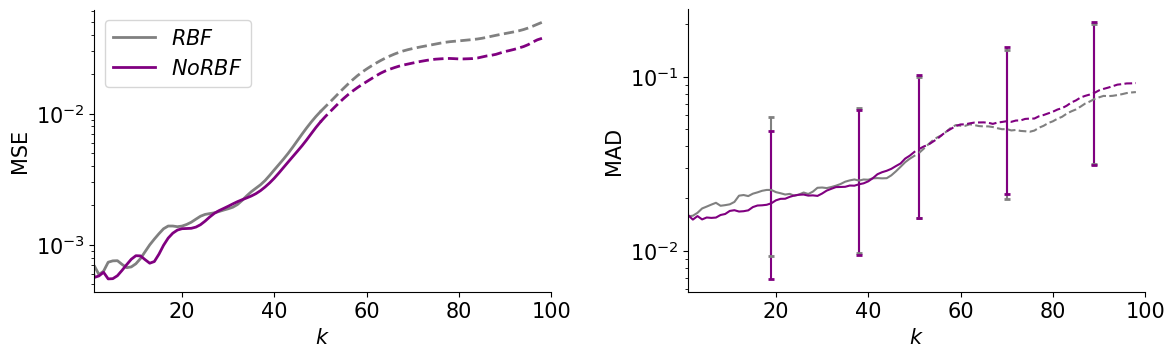

In [12]:
n_shifts = model_configs[0]['n_shifts']
t_end = 100
results = plot_mse_mad(models, model_labels, x_true, n_shifts, t_end)

$RBF$


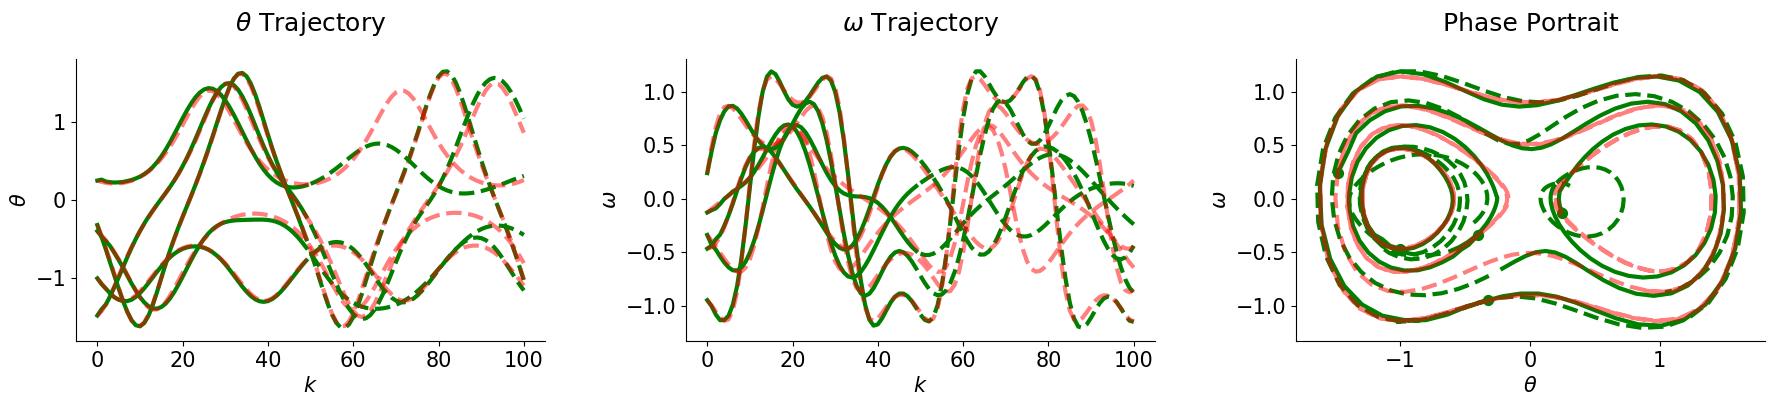

$No RBF$


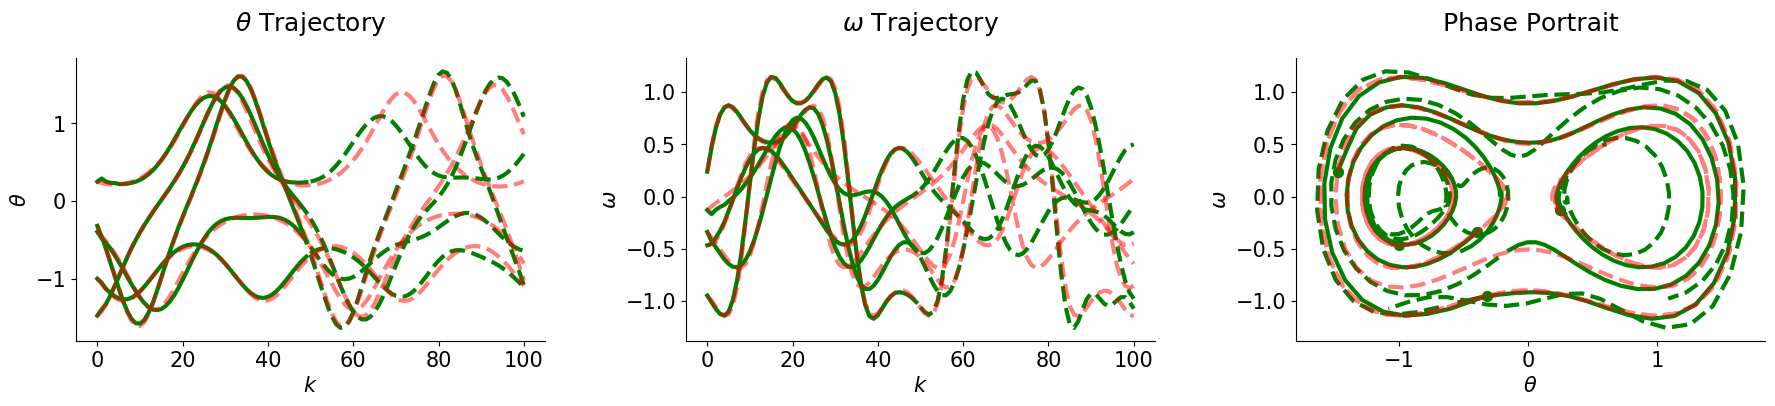

In [17]:
for i in range(2):
    print(model_labels[i])
    _ = plot_trajectories(models[i], 50, x_true)